### Computing climatology, testing settings for Contrack

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm

In [2]:
##some data
icon_data=xr.open_mfdataset('/scratch/b/b382006/nextgems/cycle3/ngc3028/z500/6h/*')

In [3]:
### take a sample
sample=icon_data.where(icon_data.time.dt.year.isin([2021]), drop=True)
sample

<xarray.Dataset>
Dimensions:  (time: 1412, lat: 181, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-12-30T18:00:00
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) int64 90 89 88 87 86 85 84 83 ... -84 -85 -86 -87 -88 -89 -90
Data variables:
    zg       (time, lat, lon) float32 dask.array<chunksize=(4, 181, 360), meta=np.ndarray>

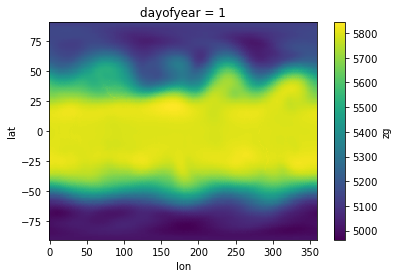

In [4]:
### compute climatology
clim = sample['zg'].groupby("time.dayofyear").mean("time")
#clim[0,...].plot()
window=31
groupby="dayofyear"
clim2 = clim.rolling(**{groupby:window}, center=True).mean().fillna(
            clim[-window:].mean(dim=groupby))
clim2[0,...].plot()

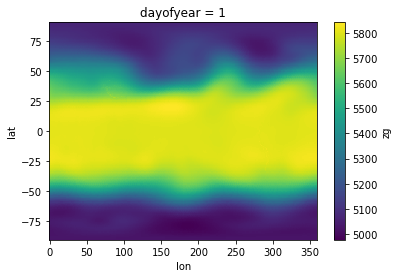

In [5]:
### Full dataset
clim = icon_data['zg'].groupby("time.dayofyear").mean("time")
window=31
groupby="dayofyear"
clim2 = clim.rolling(**{groupby:window}, center=True).mean().fillna(
            clim[-window:].mean(dim=groupby))
clim2[0,...].plot()